In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
path = "/content/gdrive/MyDrive/JPM/centralbank_analysis/data/FOMC/statement/"
os.chdir(path)
os.listdir(path)
file_list=[i for i in os.listdir(path) if 'txt' in i]

In [3]:
file_list_time=[file_list[i].split('-')[0][-4:]+file_list[i].split('-')[1]+file_list[i].split('-')[2][:2] for i in range(len(file_list))]

In [4]:
repeat_sentence='The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system. Monetary Policy Principles and Practice Review of Monetary Policy Strategy, Tools, and Communications Banking Applications & Legal Developments Reserve Bank Payment Services & Data Financial Market Utilities & Infrastructures Exchange Rates and International Data Micro Data Reference Manual (MDRM) Money Stock and Reserve Balances' 

In [5]:
statement_text=dict()
for i in range(len(file_list)):
  f=open(path+file_list[i],'r',encoding='latin1')
  f1=f.readlines()
  contents=[]
  for line in f1:
    if ('[SECTION]' not in line):
      if len(line.strip().split(' '))>=5:
        if ('Voting for the FOMC monetary policy action were' in line):
          break
        contents.append(line.strip())
  text = ' '.join(contents)
  text=text.replace('Â\xa0',' ')
  text=text.replace(repeat_sentence,"")
  if len(text.split(' '))>100:
    statement_text[file_list_time[i]]='statement '+text
  else:
    print(i,len(text.split(' ')),text)

3 99 Chairman Alan Greenspan announced today that the Federal Open Market Committee decided to increase slightly the degree of pressure on reserve positions. The action is expected to be associated with a small increase in short-term money market interest rates. The decision was taken to move toward a less accommodative stance in monetary policy in order to sustain and enhance the economic expansion. Chairman Greenspan decided to announce this action immediately so as to avoid any misunderstanding of the Committee's purposes, given the fact that this is the first firming of reserve market conditions by the Committee since early 1989.
15 36 Chairman Alan Greenspan announced today that the Federal Reserve will increase slightly the degree of pressure on reserve positions. This action is expected to be associated with a small increase in short-term money market interest rates.
41 71 Chairman Alan Greenspan announced today that the Federal Open Market Committee decided to decrease slightly

In [6]:
path = "/content/gdrive/MyDrive/JPM/centralbank_analysis/data/FOMC/speech/"
os.chdir(path)
os.listdir(path)
file_list=[i for i in os.listdir(path) if 'txt' in i]

In [7]:
file_list_time_speech=[file_list[i].split('-')[0][-4:]+file_list[i].split('-')[1]+file_list[i].split('-')[2][:2] for i in range(len(file_list))]

In [8]:
speech_dicter={}
path_save = "/content/gdrive/MyDrive/JPM/centralbank_analysis/data/FOMC/text_summarization/speech/"
for i in range(len(file_list)):
  #print(i,file_list[i])
  f=open(path+file_list[i],'r',encoding='latin1')
  f1=f.readlines()
  contents=[]
  for line in f1:
    #print(line)
    if ('[SECTION]' not in line):
      if len(line.strip().split(' '))>=5:
        contents.append(line.strip().replace('Â',' '))
  
  text = ' '.join(contents)
  text=text.replace('Â\xa0',' ')
  text=text.replace(repeat_sentence,"")
  #print(text)
  if (len(text.split(' '))<100):
    print('!',i,text)
  else:
    speech_dicter[file_list_time_speech[i]]='speech '+text

! 84 Reflections on the Capital Goods Overhang
! 104 
! 110 Corporate governance, the subject of our conference, has evolved over the past century to more effectively promote the allocation of the nation s savings to its most productive uses.  And, generally speaking, the resulting structure of business incentives, reporting, and accountability has served us well.  We could not have achieved our current level of national productivity if corporate governance had been deeply flawed.
! 154 
! 159 
! 169 
! 188 
! 205 
! 254 
! 321 Asset Prices and Monetary Policy
! 333 Thank you, Tom.  On behalf of the Federal Reserve, I am pleased to be with you all as we unveil the newly designed $20 note.
! 370 I am pleased to appear once again before the Independent Community Bankers of America.  There can be little doubt that the business environment in which you have operated over the past year has been challenging.
! 406 
! 469 
! 519 Thank you. I am pleased to have the opportunity to help launch 

In [9]:
import pandas as pd
raw_data_speech=pd.DataFrame({'date':speech_dicter.keys(),'text':speech_dicter.values(),'type':['speech' for i in range(len(speech_dicter.values()))]})
raw_data_speech.sort_values(by='date',inplace=True)
raw_data_speech

,date,text,type
1083,19960613,speech Remarks by Chairman Alan Greenspan Bank...,speech
488,19960618,"speech Remarks by Governor Edward W. Kelley, J...",speech
15,19960908,speech Monetary Policy Objectives and Strategy...,speech
1232,19960919,speech Remarks by Chairman Alan Greenspan Regu...,speech
1236,19961002,speech Remarks by Governor Lawrence B. Lindsey...,speech
...,...,...,...
810,20220221,speech At the American Bankers Association Co...,speech
700,20220224,"speech At the Economic Forecast Project, Univ...",speech
737,20220318,speech At Fed Listens: Helping Youth ThriveÃ¢...,speech
805,20220321,speech Chair Pro Tempore Jerome H. Powell At ...,speech


In [10]:
raw_data_statement=pd.DataFrame({'date':statement_text.keys(),'text':statement_text.values(),'type':['statement' for i in range(len(statement_text.values()))]})
raw_data_statement.sort_values(by='date',inplace=True)
raw_data_statement

,date,text,type
186,19940517,statement The Federal Reserve today announced ...,statement
146,19940816,statement The Federal Reserve announced today ...,statement
177,19941115,statement The Federal Reserve Board today appr...,statement
153,19950201,statement The Federal Reserve Board today appr...,statement
25,19960131,statement The Federal Reserve today announced ...,statement
...,...,...,...
149,20210922,statement For release at 2:00 p.m. EDT The Fe...,statement
88,20211103,statement For release at 2:00 p.m. EDT The Fe...,statement
33,20211215,statement For release at 2:00 p.m. EST The Fe...,statement
66,20220126,statement For release at 2:00 p.m. EST Indica...,statement


In [11]:
raw_data=raw_data_speech
raw_data.sort_values(by='date',inplace=True)

In [12]:
raw_data

,date,text,type
1083,19960613,speech Remarks by Chairman Alan Greenspan Bank...,speech
488,19960618,"speech Remarks by Governor Edward W. Kelley, J...",speech
15,19960908,speech Monetary Policy Objectives and Strategy...,speech
1232,19960919,speech Remarks by Chairman Alan Greenspan Regu...,speech
1236,19961002,speech Remarks by Governor Lawrence B. Lindsey...,speech
...,...,...,...
810,20220221,speech At the American Bankers Association Co...,speech
700,20220224,"speech At the Economic Forecast Project, Univ...",speech
737,20220318,speech At Fed Listens: Helping Youth ThriveÃ¢...,speech
805,20220321,speech Chair Pro Tempore Jerome H. Powell At ...,speech


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
import nltk
import re
from nltk.corpus import stopwords
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
raw_data=pd.concat([raw_data_statement,raw_data_speech],axis=0)
raw_data.sort_values(by='date',inplace=True)
eng_stopwords = stopwords.words('english')
def clean_text(text):
    #text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.lower().split()
    words = [w for w in words if w not in eng_stopwords]
    return ' '.join(words)

raw_data['clean_review'] = raw_data.text.apply(clean_text)

In [49]:
interest_rate=pd.read_csv('/content/gdrive/MyDrive/JPM/Interest Rate/Interest_3m_US.csv',index_col=[0])
interest_rate=interest_rate.sort_values(by='Date')
interest_rate['range']=list(range(len(interest_rate)))
raw_data['change']=np.nan
for i in range(len(raw_data)):
  try:
    index=int(interest_rate[interest_rate['Date']<=int(raw_data.iloc[i,0])]['range'].tail(1))
    raw_data.iloc[i,-1]=(interest_rate.iloc[index+30,1]-interest_rate.iloc[index,1])/(1+interest_rate.iloc[index,1])
  except:
    pass
new_raw=raw_data.dropna()
new_raw
new_raw.to_csv('/content/gdrive/MyDrive/JPM/Baseline_Model/US_3m.csv')
# train=new_raw.head(int(0.8*len(new_raw)))
# test=new_raw.tail(int(0.2*len(new_raw)))
# train_label=np.array(train.change).reshape(-1,1)
# test_label=np.array(test.change).reshape(-1,1)

In [36]:
best_IC=-1
alpha=0
for features in range(200,3000,100):
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  best_alpha=0
  best_IC=-1
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  from sklearn.linear_model import RidgeCV
  for enlarge in range(1,100,10):
    clf = RidgeCV(alphas=enlarge)
    clf.fit(train_vsm_tfidf,train_label)
    train_predict=clf.predict(train_vsm_tfidf)
    test_predict=clf.predict(test_vsm_tfidf)
    print(mean_squared_error(train_predict, train_label),'train_err',mean_squared_error(test_predict, test_label),'test_err',test_label.var())
    print('train_IC',stats.spearmanr([i[0]for i in train_predict],[i[0] for i in train_label]))
    print('test_IC',stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label]))
    if stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]>best_IC:
      best_IC=stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]
      best_alpha=np.log(alpha)
  print(best_IC,features)

以词频为元素的文本-单词矩阵的维度是：

 (1209, 4)
0.0006681340164504215 train_err 0.0012548183629603473 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.40459074285471996, pvalue=7.937317130041698e-49)
test_IC SpearmanrResult(correlation=0.07280854251233425, pvalue=0.20705472385632118)
0.0007423820002880501 train_err 0.0012126233402626522 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3129022436516452, pvalue=7.182399074257779e-29)
test_IC SpearmanrResult(correlation=0.10717286057338556, pvalue=0.06287096497773337)
0.0007573255023040007 train_err 0.0012119652291731368 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.28668725243917337, pvalue=2.6368828588508e-24)
test_IC SpearmanrResult(correlation=0.0995007892851391, pvalue=0.08430156390793872)
0.0007646241283900171 train_err 0.0012121155668305232 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2730047224954708, pvalue=4.1658448382385017e-22)
test_IC SpearmanrResult(corre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007690928447793734 train_err 0.0012123336984641228 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.26403127845368823, pvalue=9.888713077371238e-21)
test_IC SpearmanrResult(correlation=0.0934248242557013, pvalue=0.10515426764098608)
0.0007721530548503801 train_err 0.0012125328837085706 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.25792453153731126, pvalue=7.971826015391825e-20)
test_IC SpearmanrResult(correlation=0.09084452145297324, pvalue=0.11515913080721031)
0.0007743965683930844 train_err 0.0012127032657586773 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2533477554125384, pvalue=3.6756439751120705e-19)
test_IC SpearmanrResult(correlation=0.08938064345936138, pvalue=0.1211577736511585)
0.0007761193039011327 train_err 0.0012128477461700474 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.24961378737344894, pvalue=1.2505038660724275e-18)
test_IC SpearmanrResult(correlation=0.0868846443446583, pv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.000755475310692964 train_err 0.0012160183315395089 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.30393558333371334, pvalue=2.956417890065995e-27)
test_IC SpearmanrResult(correlation=0.08335978261417328, pvalue=0.14841647809601205)
0.000763540951031157 train_err 0.0012150481219322519 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.28934694752467294, pvalue=9.534118807756466e-25)
test_IC SpearmanrResult(correlation=0.08338113083258822, pvalue=0.14831220904719414)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007683862853127433 train_err 0.001214651335072696 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2795851315556148, pvalue=3.782140451730543e-23)
test_IC SpearmanrResult(correlation=0.08243505621446501, pvalue=0.1529866949257371)
0.0007716624422450683 train_err 0.0012144578459652635 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.27319838117464956, pvalue=3.885468730195576e-22)
test_IC SpearmanrResult(correlation=0.0783636459881876, pvalue=0.17438211782015006)
0.0007740418560362707 train_err 0.0012143540237715999 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2683828166122274, pvalue=2.1609710551197814e-21)
test_IC SpearmanrResult(correlation=0.07679150218920182, pvalue=0.18321338235003923)
0.0007758556623382703 train_err 0.00121429533996014 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.264499579486364, pvalue=8.407075505190543e-21)
test_IC SpearmanrResult(correlation=0.07445866472996134, pvalue=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007532210972523615 train_err 0.0012181494706328335 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3163732795792602, pvalue=1.645018080950386e-29)
test_IC SpearmanrResult(correlation=0.06501273159824163, pvalue=0.26003538950429383)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.000762032507055498 train_err 0.0012167337564505019 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2989497160662713, pvalue=2.2101039323419962e-26)
test_IC SpearmanrResult(correlation=0.06212200855368833, pvalue=0.2818699406819679)
0.0007672632115993166 train_err 0.0012160505609944074 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2883359010503366, pvalue=1.405358839128505e-24)
test_IC SpearmanrResult(correlation=0.05882240177479994, pvalue=0.30826578550972583)
0.000770772614582658 train_err 0.001215655211978724 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2805160363794141, pvalue=2.679388377655918e-23)
test_IC SpearmanrResult(correlation=0.05605061880427272, pvalue=0.33165789722993144)
0.0007733074701260434 train_err 0.0012154008852188777 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2755061714342057, pvalue=1.6863968369355386e-22)
test_IC SpearmanrResult(correlation=0.05367225300167791, pvalue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007324894300191465 train_err 0.0012229325326624414 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.36150920723211527, pvalue=1.2381288958178935e-38)
test_IC SpearmanrResult(correlation=0.049941107236259004, pvalue=0.3871350664904154)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.000752556510065563 train_err 0.0012182464315236667 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3243746207465904, pvalue=5.1055007254380185e-31)
test_IC SpearmanrResult(correlation=0.0554397983508494, pvalue=0.3369624811623402)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007616886618107243 train_err 0.001216745954687151 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.30661636296631656, pvalue=9.861441168653224e-28)
test_IC SpearmanrResult(correlation=0.0548169967544381, pvalue=0.34242667941934424)
0.0007670668651047078 train_err 0.001216034791716671 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2954726569524144, pvalue=8.782239965094255e-26)
test_IC SpearmanrResult(correlation=0.051528064084757186, pvalue=0.3722097744675331)
0.000770656162094619 train_err 0.0012156292279606009 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2874920879685271, pvalue=1.940426033177919e-24)
test_IC SpearmanrResult(correlation=0.051039233450847786, pvalue=0.37676893538504563)
0.000773238707524415 train_err 0.0012153714304958796 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2814303146287903, pvalue=1.9074358703370272e-23)
test_IC SpearmanrResult(correlation=0.048003865334585116, pvalu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007307358171408846 train_err 0.0012211707365646417 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.37363804711753645, pvalue=2.379082048316753e-41)
test_IC SpearmanrResult(correlation=0.05857667942406474, pvalue=0.3102945505008813)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.000751908350728581 train_err 0.0012170807734893858 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3338302286561252, pvalue=7.350858245413197e-33)
test_IC SpearmanrResult(correlation=0.05805125184430117, pvalue=0.3146620164505075)
0.0007613903830596268 train_err 0.0012158794350669042 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3147294827906109, pvalue=3.314096814373969e-29)
test_IC SpearmanrResult(correlation=0.05675118891062415, pvalue=0.32564039858589033)
0.0007669231646658276 train_err 0.0012153472084143618 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.30265113717000874, pvalue=4.982732505220354e-27)
test_IC SpearmanrResult(correlation=0.05326097303874524, pvalue=0.35632333335248945)
0.0007705926650007326 train_err 0.0012150604661016705 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.294818435031679, pvalue=1.1361240592766477e-25)
test_IC SpearmanrResult(correlation=0.050373953256570035, pval

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007294321809842335 train_err 0.0012210595319849795 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3787433086038031, pvalue=1.5771440832849173e-42)
test_IC SpearmanrResult(correlation=0.05503156813340457, pvalue=0.3405377891815784)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007512329452781803 train_err 0.0012171864055796806 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3381590831014277, pvalue=1.0031520248286103e-33)
test_IC SpearmanrResult(correlation=0.056403082247082605, pvalue=0.3286215520427058)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007609449056944429 train_err 0.0012160167399366502 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3177788345666666, pvalue=9.006319845446088e-30)
test_IC SpearmanrResult(correlation=0.05762515883185609, pvalue=0.31823317441963345)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007665946270386436 train_err 0.0012154833165425685 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.30548277486974734, pvalue=1.571002872745211e-27)
test_IC SpearmanrResult(correlation=0.05194609705555581, pvalue=0.36833803338984583)
0.0007703341940685449 train_err 0.001215188072943071 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2971493843404774, pvalue=4.525724947063169e-26)
test_IC SpearmanrResult(correlation=0.05071051445505043, pvalue=0.37985397538199395)
0.000773008808600137 train_err 0.001215005125945975 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2910340134708567, pvalue=4.972504959122095e-25)
test_IC SpearmanrResult(correlation=0.04958123726869291, pvalue=0.3905694797486511)
0.0007750239641800048 train_err 0.001214883054762816 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.28635613337770166, pvalue=2.990629443572424e-24)
test_IC SpearmanrResult(correlation=0.04961413095216898, pvalue=

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007281154235246959 train_err 0.0012195484414426656 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3852327519335121, pvalue=4.668067234382071e-44)
test_IC SpearmanrResult(correlation=0.05668496586574515, pvalue=0.32620617463203183)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007506583098886709 train_err 0.0012162362790190482 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3433144925362808, pvalue=8.976527488711801e-35)
test_IC SpearmanrResult(correlation=0.054982772205598995, pvalue=0.34096675937176657)
0.0007606225805664438 train_err 0.0012153277784377199 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3229935795160421, pvalue=9.36725998444697e-31)
test_IC SpearmanrResult(correlation=0.05700802104849365, pvalue=0.32345216565253243)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007663926146694845 train_err 0.001214944809850053 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.31030667478855267, pvalue=2.134932410529909e-28)
test_IC SpearmanrResult(correlation=0.05440157785120049, pvalue=0.34610255222863706)
0.0007701995509531782 train_err 0.0012147472307252815 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.301795155486457, pvalue=7.04555254875394e-27)
test_IC SpearmanrResult(correlation=0.05314769677776801, pvalue=0.3573486159674061)
0.0007729156881472666 train_err 0.0012146326798258959 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2953341508309092, pvalue=9.274771123900026e-26)
test_IC SpearmanrResult(correlation=0.05181256177098074, pvalue=0.36957209156857984)
0.0007749581382243574 train_err 0.0012145610994108687 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.2909903199061744, pvalue=5.057329125486599e-25)
test_IC SpearmanrResult(correlation=0.05048091218760814, pvalue=

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007262551271926118 train_err 0.0012210253200962012 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.39352434345160753, pvalue=4.624808109319136e-46)
test_IC SpearmanrResult(correlation=0.04371047720458503, pvalue=0.44915841069471885)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007497161797174273 train_err 0.0012170774240462489 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.35125661702309, pvalue=1.9914011033293607e-36)
test_IC SpearmanrResult(correlation=0.0490135489300263, pvalue=0.39602450527221134)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007600236098469059 train_err 0.0012159216240975202 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.33094862635168815, pvalue=2.719511673235478e-32)
test_IC SpearmanrResult(correlation=0.048405778222090835, pvalue=0.4019151501455438)
0.0007659684386384799 train_err 0.0012154066230682878 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3181397062668292, pvalue=7.711703145785995e-30)
test_IC SpearmanrResult(correlation=0.048322128060138414, pvalue=0.40272998048715236)
0.0007698790351094492 train_err 0.0012151265867406554 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3095708071183482, pvalue=2.901737835398203e-28)
test_IC SpearmanrResult(correlation=0.048111695621476894, pvalue=0.40478413992398365)
0.000772662623814011 train_err 0.001214955435220885 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.30316871017491787, pvalue=4.0388156044961324e-27)
test_IC SpearmanrResult(correlation=0.045811098328822214, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.000724046511427912 train_err 0.0012213230236147678 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.40517117565110694, pvalue=5.6456629625686325e-49)
test_IC SpearmanrResult(correlation=0.038548129449511616, pvalue=0.5045389389166274)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007485166521480366 train_err 0.0012172716143170515 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.36125688529933636, pvalue=1.4061897827442734e-38)
test_IC SpearmanrResult(correlation=0.0440627228084315, pvalue=0.4455089348752954)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.000759214322023935 train_err 0.0012160670666066262 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3393983893208902, pvalue=5.638754139674546e-34)
test_IC SpearmanrResult(correlation=0.04359720094360781, pvalue=0.4503355968086814)
0.0007653632822390939 train_err 0.0012155226371325988 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.32689288639415054, pvalue=1.6745054604879533e-31)
test_IC SpearmanrResult(correlation=0.042892274057988025, pvalue=0.45770027787093326)
0.0007693983263643694 train_err 0.001215222892665231 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3177097241067157, pvalue=9.277778760729539e-30)
test_IC SpearmanrResult(correlation=0.043241034238419816, pvalue=0.45404824943972)
0.0007722652504145001 train_err 0.0012150376619436897 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3114034888545776, pvalue=1.3490731723162678e-28)
test_IC SpearmanrResult(correlation=0.04170200196187354, pvalu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007221053039046769 train_err 0.0012216317376205555 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.41667383504486344, pvalue=5.733760087951213e-52)
test_IC SpearmanrResult(correlation=0.0348476989779346, pvalue=0.5463355130130154)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007474569262816992 train_err 0.0012174412957537714 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3719052334760748, pvalue=5.910842581957444e-41)
test_IC SpearmanrResult(correlation=0.04068273345204197, pvalue=0.481214638800026)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007585088647711959 train_err 0.0012161777127187548 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.34972503687958145, pvalue=4.186291818585583e-36)
test_IC SpearmanrResult(correlation=0.040701467602895905, pvalue=0.4810125536878589)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007648457132871953 train_err 0.0012156037344793018 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3360472263433626, pvalue=2.6611835470742457e-33)
test_IC SpearmanrResult(correlation=0.04059734057838222, pvalue=0.4821363532161649)
0.0007689953900053224 train_err 0.0012152869489752565 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.32696253330473635, pvalue=1.6234220544347908e-31)
test_IC SpearmanrResult(correlation=0.03873612447494112, pvalue=0.5024612184334277)
0.0007719386260635628 train_err 0.0012150908313943054 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3201088264129396, pvalue=3.2942924586358775e-30)
test_IC SpearmanrResult(correlation=0.039780226626602314, pvalue=0.4910042295026734)
0.0007741412762124946 train_err 0.0012149598311745275 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.31490838568207424, pvalue=3.071501296349326e-29)
test_IC SpearmanrResult(correlation=0.0385860334291463, pv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007215042814809522 train_err 0.0012214951521655045 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.424193637071763, pvalue=5.464747552816466e-54)
test_IC SpearmanrResult(correlation=0.0358599966409368, pvalue=0.534734059177063)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007472622982572803 train_err 0.0012173619157038922 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3783827356862727, pvalue=1.9133835572614662e-42)
test_IC SpearmanrResult(correlation=0.041298346362660485, pvalue=0.4745981602195499)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007584299032561366 train_err 0.0012161225223570236 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3552034846638118, pvalue=2.879890701759407e-37)
test_IC SpearmanrResult(correlation=0.042416513761883705, pvalue=0.46270853018430425)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007648141129122888 train_err 0.0012155620520252065 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.34097807007290415, pvalue=2.6954539396403e-34)
test_IC SpearmanrResult(correlation=0.037693329357060434, pvalue=0.5140427315476591)
0.000768986830020828 train_err 0.0012152538376183242 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3312254314840105, pvalue=2.3998169896040679e-32)
test_IC SpearmanrResult(correlation=0.036927625400647104, pvalue=0.5226339400696511)
0.0007719424216487864 train_err 0.0012150636018033894 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3245194318606837, pvalue=4.78984474280945e-31)
test_IC SpearmanrResult(correlation=0.037434100990593334, pvalue=0.5169430711741618)
0.0007741520876033004 train_err 0.0012149368617429476 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.31945680122360126, pvalue=4.368995674956363e-30)
test_IC SpearmanrResult(correlation=0.03725634439644447, pvalu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007212649094767091 train_err 0.0012208295025224326 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4267090778653472, pvalue=1.1221374772249585e-54)
test_IC SpearmanrResult(correlation=0.03879777290158834, pvalue=0.5017808617278127)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007472360049344634 train_err 0.001216953331593642 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3806191372683084, pvalue=5.748103441331279e-43)
test_IC SpearmanrResult(correlation=0.04281472338701132, pvalue=0.4585145703193354)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007584541614372416 train_err 0.0012158263735405968 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3575895627634833, pvalue=8.828282218955124e-38)
test_IC SpearmanrResult(correlation=0.041306624243270355, pvalue=0.47450953131181206)
0.0007648545653998925 train_err 0.0012153297808930145 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3432261954779912, pvalue=9.35898998190105e-35)
test_IC SpearmanrResult(correlation=0.04054200948167412, pvalue=0.482734096092724)
0.00076903254791543 train_err 0.0012150628664802455 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.33371230118840345, pvalue=7.757265821812628e-33)
test_IC SpearmanrResult(correlation=0.03752646471108245, pvalue=0.5159087065438197)
0.0007719892081125167 train_err 0.0012149015363471238 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3270398365202688, pvalue=1.568530902641663e-31)
test_IC SpearmanrResult(correlation=0.03883219145780834, pvalue=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007208452402207796 train_err 0.0012213580076491917 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.43138075821888694, pvalue=5.723122714776687e-56)
test_IC SpearmanrResult(correlation=0.03507773692330372, pvalue=0.543688300081889)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007470960888069059 train_err 0.0012172995193855474 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3846929943181722, pvalue=6.274942024296443e-44)
test_IC SpearmanrResult(correlation=0.03886791704780885, pvalue=0.5010073360997603)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007584010542208142 train_err 0.0012160855605911351 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.36152165084968935, pvalue=1.230377711719036e-38)
test_IC SpearmanrResult(correlation=0.04011330240166802, pvalue=0.48737897388974405)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.000764838711119255 train_err 0.0012155373017663975 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3468958641365574, pvalue=1.6337648127960103e-35)
test_IC SpearmanrResult(correlation=0.037093400851808005, pvalue=0.5207677323880306)
0.0007690352646628858 train_err 0.001215236067596654 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.33721620999605995, pvalue=1.552192871339984e-33)
test_IC SpearmanrResult(correlation=0.03470283606726181, pvalue=0.5480058098410476)
0.000772001958459286 train_err 0.0012150502572832698 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.33057086664229957, pvalue=3.224943705573875e-32)
test_IC SpearmanrResult(correlation=0.03330735966760782, pvalue=0.5642233138561489)
0.0007742165783303172 train_err 0.001214926520708002 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.32538411558839436, pvalue=3.2696876932346923e-31)
test_IC SpearmanrResult(correlation=0.03199727614161357, pvalu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007200564583693919 train_err 0.001222079661608914 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.43583446306130647, pvalue=3.20996402225312e-57)
test_IC SpearmanrResult(correlation=0.03225236556777574, pvalue=0.5766345577715032)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007466770968488371 train_err 0.0012177456668682836 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3885815857646125, pvalue=7.356169486179183e-45)
test_IC SpearmanrResult(correlation=0.03914675092098354, pvalue=0.49793867908554856)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007581203127970549 train_err 0.0012164103272583856 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3649912403977446, pvalue=2.1127068907738568e-39)
test_IC SpearmanrResult(correlation=0.03715657415119914, pvalue=0.5200574623974278)
0.000764629697751123 train_err 0.0012157933887176912 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.35027026764949964, pvalue=3.2148886963903786e-36)
test_IC SpearmanrResult(correlation=0.037538663693033845, pvalue=0.5157721722578363)
0.0007688698574182921 train_err 0.0012154478470263747 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3404086786528749, pvalue=3.5187452606433743e-34)
test_IC SpearmanrResult(correlation=0.03730775439181105, pvalue=0.5183597330019967)
0.0007718657073870804 train_err 0.0012152310263575008 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.33359469966537125, pvalue=8.184733431795028e-33)
test_IC SpearmanrResult(correlation=0.034474758672563444, p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007191318758794487 train_err 0.0012224368757782556 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4411908038162233, pvalue=9.481126593806948e-59)
test_IC SpearmanrResult(correlation=0.028184005086986177, pvalue=0.6256549690262583)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007461697897887051 train_err 0.0012179407261690264 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3928749495865857, pvalue=6.670064488745172e-46)
test_IC SpearmanrResult(correlation=0.034890177575801054, pvalue=0.5458462030784859)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007577744503172076 train_err 0.0012165398737898447 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3693397228248195, pvalue=2.2511742778999834e-40)
test_IC SpearmanrResult(correlation=0.036484323110092025, pvalue=0.5276411276722306)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007643691505035033 train_err 0.0012158888290558678 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.35460852356194067, pvalue=3.861286079760063e-37)
test_IC SpearmanrResult(correlation=0.03448456142591724, pvalue=0.5505272905932653)
0.000768661817754213 train_err 0.0012155228087403944 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3442865207150752, pvalue=5.665509957663981e-35)
test_IC SpearmanrResult(correlation=0.03301153435528654, pvalue=0.5676905463807744)
0.0007716930984619081 train_err 0.0012152925015395325 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.337386960875028, pvalue=1.43437406224131e-33)
test_IC SpearmanrResult(correlation=0.029419587687491554, pvalue=0.6105784037348466)
0.0007739539399068007 train_err 0.0012151363377802026 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.33209179925928367, pvalue=1.621151778646089e-32)
test_IC SpearmanrResult(correlation=0.02994022281005993, pvalue=

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007179489139749543 train_err 0.0012221171055156411 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.44657827568424696, pvalue=2.5730443125746386e-60)
test_IC SpearmanrResult(correlation=0.02923529592444015, pvalue=0.6128169378926654)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007455207203424017 train_err 0.001217768103407364 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.39765961051813226, pvalue=4.405400595786187e-47)
test_IC SpearmanrResult(correlation=0.03467103157860282, pvalue=0.5483728575062542)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007573300809950357 train_err 0.0012164187751476944 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3741549274899803, pvalue=1.811533866206188e-41)
test_IC SpearmanrResult(correlation=0.035858253929229464, pvalue=0.5347539247844093)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007640327856909396 train_err 0.0012157945420501162 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3592075725738311, pvalue=3.936986496695994e-38)
test_IC SpearmanrResult(correlation=0.03352519863102555, pvalue=0.5616766263523782)
0.0007683919752725278 train_err 0.0012154452038229335 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.349704291858196, pvalue=4.2285139720031725e-36)
test_IC SpearmanrResult(correlation=0.031853284586794456, pvalue=0.5813626198380433)
0.0007714682230700571 train_err 0.0012152263766362888 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3424596211018277, pvalue=1.3437006521804713e-34)
test_IC SpearmanrResult(correlation=0.03129191357806696, pvalue=0.5880437618651173)
0.0007737614244418177 train_err 0.0012150786393655701 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3371106208929397, pvalue=1.6298026235165456e-33)
test_IC SpearmanrResult(correlation=0.03179838916801319, pval

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007168013392477068 train_err 0.0012221928741049212 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4524707309435468, pvalue=4.6202018398445275e-62)
test_IC SpearmanrResult(correlation=0.02801866531375212, pvalue=0.6276844986386336)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007448990690556647 train_err 0.0012177734024016518 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.40321265549792046, pvalue=1.7774232483186322e-48)
test_IC SpearmanrResult(correlation=0.03318057739089869, pvalue=0.5657080280371941)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007569140805223181 train_err 0.0012164091443998082 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.37951836433240865, pvalue=1.0401669491104597e-42)
test_IC SpearmanrResult(correlation=0.035045714595681315, pvalue=0.5440564233668146)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007637246416130146 train_err 0.0012157809822383912 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.36450253047414444, pvalue=2.7113989153957602e-39)
test_IC SpearmanrResult(correlation=0.032390693309546, pvalue=0.574999957899051)
0.0007681494449280778 train_err 0.0012154308931696975 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.35463178446889837, pvalue=3.8173142916614855e-37)
test_IC SpearmanrResult(correlation=0.02920305575785433, pvalue=0.6132089195390192)
0.0007712694328031674 train_err 0.001215212381634387 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3474461164918486, pvalue=1.2550164693438323e-35)
test_IC SpearmanrResult(correlation=0.02908084809937698, pvalue=0.6146957406203069)
0.0007735936781928752 train_err 0.0012150653219049577 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3422717988697459, pvalue=1.4679823278922868e-34)
test_IC SpearmanrResult(correlation=0.02977205113030144, pvalu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007160903998803184 train_err 0.0012218773098173414 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4564284022926234, pvalue=2.969733268070353e-63)
test_IC SpearmanrResult(correlation=0.02903771598462027, pvalue=0.6152208777267255)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007445249793358405 train_err 0.0012176355725493028 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.40671549140430735, pvalue=2.2731157517147427e-49)
test_IC SpearmanrResult(correlation=0.034236225007621024, pvalue=0.553402933714426)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007566686141014477 train_err 0.0012163223018031549 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3829601365383672, pvalue=1.6159869963721364e-43)
test_IC SpearmanrResult(correlation=0.03520255864934209, pvalue=0.5422545487489228)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007635455093808025 train_err 0.0012157175583287184 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3684504845971646, pvalue=3.5684851218331782e-40)
test_IC SpearmanrResult(correlation=0.03276995094485627, pvalue=0.5705295410154776)
0.0007680101255061272 train_err 0.0012153808553346847 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3584668530811128, pvalue=5.701259567257281e-38)
test_IC SpearmanrResult(correlation=0.030597225123727815, pvalue=0.5963601222962562)
0.0007711563584479402 train_err 0.001215171014426969 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.35124239089549514, pvalue=2.005229591080364e-36)
test_IC SpearmanrResult(correlation=0.02907409509151103, pvalue=0.6147779460928893)
0.0007734990548562633 train_err 0.0012150300388440122 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3457010765292726, pvalue=2.891401727739384e-35)
test_IC SpearmanrResult(correlation=0.02751415027447665, pvalu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007156704914728844 train_err 0.0012219242627486966 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4590282797370806, pvalue=4.798649423131267e-64)
test_IC SpearmanrResult(correlation=0.03190513026008788, pvalue=0.5807473661276992)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007443208523790296 train_err 0.00121761394087718 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4097005947286975, pvalue=3.863682089603058e-50)
test_IC SpearmanrResult(correlation=0.036720460546436844, pvalue=0.5249708819955301)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007565435147799168 train_err 0.00121628612998046 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.38568625643538634, pvalue=3.639218002123527e-44)
test_IC SpearmanrResult(correlation=0.03587459185148579, pvalue=0.5345676992589687)
0.0007634599677037907 train_err 0.0012156787897153402 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3713847371547316, pvalue=7.760687748875637e-41)
test_IC SpearmanrResult(correlation=0.032114255664968894, pvalue=0.5782687552393668)
0.0007679476564160662 train_err 0.001215343024024728 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3610667984307137, pvalue=1.5475863245970103e-38)
test_IC SpearmanrResult(correlation=0.03070527324958301, pvalue=0.5950631445528354)
0.0007711086590265472 train_err 0.0012151352112702567 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3538273597656637, pvalue=5.669345541072605e-37)
test_IC SpearmanrResult(correlation=0.02935075057505155, pvalue=

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007151362654542687 train_err 0.0012219241575110694 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.46206168399014985, pvalue=5.608305638468899e-65)
test_IC SpearmanrResult(correlation=0.030308806336162734, pvalue=0.5998284738330812)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00074404697888687 train_err 0.001217595435675208 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.41235515279007984, pvalue=7.870560221178738e-51)
test_IC SpearmanrResult(correlation=0.03592600184685237, pvalue=0.5339819221099854)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007563658538725745 train_err 0.0012162703893146235 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.38840770445852213, pvalue=8.1011883300879e-45)
test_IC SpearmanrResult(correlation=0.03210249236094434, pvalue=0.5784080456400873)
0.0007633310265889361 train_err 0.0012156666320685193 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.37425011012983606, pvalue=1.7227675389219555e-41)
test_IC SpearmanrResult(correlation=0.030183331093234123, pvalue=0.6013401942319021)
0.0007678476273081579 train_err 0.0012153336612492837 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.36403711201481664, pvalue=3.4372321971363897e-39)
test_IC SpearmanrResult(correlation=0.0281450119125344, pvalue=0.626133352932617)
0.0007710275480193298 train_err 0.0012151279094756561 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.35686528650130017, pvalue=1.2653479177744984e-37)
test_IC SpearmanrResult(correlation=0.026936877021419656, pv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00071446047906616 train_err 0.0012209930634642702 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.46554206366553125, pvalue=4.650838592083536e-66)
test_IC SpearmanrResult(correlation=0.03746176653894739, pvalue=0.5166331376043158)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007436918652936677 train_err 0.0012170491370520837 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4157923074462701, pvalue=9.817336622288262e-52)
test_IC SpearmanrResult(correlation=0.04098727232289996, pvalue=0.4779352898187591)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007561304693153901 train_err 0.0012158801354934926 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.39119338735229486, pvalue=1.7151119894983426e-45)
test_IC SpearmanrResult(correlation=0.03680759613180394, pvalue=0.5239872929615979)
0.0007631574078789467 train_err 0.0012153620051606445 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3769957561509121, pvalue=4.014808660575508e-42)
test_IC SpearmanrResult(correlation=0.034872096941837384, pvalue=0.5460544470280962)
0.0007677112804681377 train_err 0.0012150834258046444 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.36637044139890007, pvalue=1.0424014675873448e-39)
test_IC SpearmanrResult(correlation=0.032143881763993715, pvalue=0.5779180193392315)
0.0007709159332285969 train_err 0.001214915390919605 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.35937755951993305, pvalue=3.6157667640289166e-38)
test_IC SpearmanrResult(correlation=0.031137030075076955,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007133972143525993 train_err 0.0012216504546734368 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4700318736728301, pvalue=1.794859966816418e-67)
test_IC SpearmanrResult(correlation=0.018107210317208727, pvalue=0.7539839747970746)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007430656504627302 train_err 0.0012174744338985166 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.419779127078259, pvalue=8.514179753109787e-53)
test_IC SpearmanrResult(correlation=0.022599703259772615, pvalue=0.6956773111872813)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007556877962582604 train_err 0.001216196598506266 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.39580274436499147, pvalue=1.2714299399329155e-46)
test_IC SpearmanrResult(correlation=0.02059667399114657, pvalue=0.7214769958514345)
0.0007628159263196339 train_err 0.0012156147381321603 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3808914674516642, pvalue=4.961889686869505e-43)
test_IC SpearmanrResult(correlation=0.0208010069388324, pvalue=0.7188300405299363)
0.0007674338268122713 train_err 0.0012152941151393891 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3708678839443452, pvalue=1.0165037818783128e-40)
test_IC SpearmanrResult(correlation=0.01930750300564043, pvalue=0.7382525230234496)
0.0007706825744106555 train_err 0.001215096191001786 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3635948492094739, pvalue=4.3046847424095136e-39)
test_IC SpearmanrResult(correlation=0.019477417397106258, pvalu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007131549158058978 train_err 0.0012211976923517164 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4724803124611738, pvalue=2.980450603894621e-68)
test_IC SpearmanrResult(correlation=0.021640993981771176, pvalue=0.7079842641184675)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007429733305787157 train_err 0.001217259579763228 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.42246605212636257, pvalue=1.6083901844982276e-53)
test_IC SpearmanrResult(correlation=0.02616289518439646, pvalue=0.6506533737725868)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.000755641614724002 train_err 0.001216059004475282 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.39793694870583224, pvalue=3.758221816671965e-47)
test_IC SpearmanrResult(correlation=0.022733456383311104, pvalue=0.6939665560902852)
0.0007627901687265917 train_err 0.0012155144932268905 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.38300475361300323, pvalue=1.5772154179904991e-43)
test_IC SpearmanrResult(correlation=0.021340158373291288, pvalue=0.7118619691315013)
0.0007674188298197081 train_err 0.0012152156541140394 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.373079085927572, pvalue=3.1927649911528933e-41)
test_IC SpearmanrResult(correlation=0.020614536786146824, pvalue=0.7212454659293848)
0.00077067385969414 train_err 0.001215031920322053 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.36557728894951147, pvalue=1.5655092795076493e-39)
test_IC SpearmanrResult(correlation=0.02141792688323142, pval

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007128702802191463 train_err 0.0012210949151818839 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.47489950789940394, pvalue=4.984256908633232e-69)
test_IC SpearmanrResult(correlation=0.021019499419140383, pvalue=0.7160033699511175)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007428582495838188 train_err 0.0012171889059330806 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.42413760174722215, pvalue=5.660040202433993e-54)
test_IC SpearmanrResult(correlation=0.024863485767609685, pvalue=0.6669366795188348)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007555795928945654 train_err 0.0012160009079100911 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.39957055972293387, pvalue=1.4695934772185602e-47)
test_IC SpearmanrResult(correlation=0.022211078549035382, pvalue=0.7006566981832674)
0.0007627522432156118 train_err 0.0012154644646372743 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.38447753808788143, pvalue=7.060332962948012e-44)
test_IC SpearmanrResult(correlation=0.02104498657786026, pvalue=0.7156738899103903)
0.0007673939654325696 train_err 0.0012151716080116026 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3746854228437262, pvalue=1.368806636609812e-41)
test_IC SpearmanrResult(correlation=0.020290828086508072, pvalue=0.7254451638920594)
0.0007706568578765487 train_err 0.001214992570708315 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3673011017641821, pvalue=6.458922036418762e-40)
test_IC SpearmanrResult(correlation=0.020821483801393665, pv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007130138547447826 train_err 0.0012227124260031444 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.474920320825933, pvalue=4.90785091645876e-69)
test_IC SpearmanrResult(correlation=0.005012256709278597, pvalue=0.930875746594285)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007429548695973894 train_err 0.0012180738701764976 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4250285206271824, pvalue=3.2361160199827396e-54)
test_IC SpearmanrResult(correlation=0.008652781465915737, pvalue=0.8809630143686202)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007556580671514458 train_err 0.0012165999967283468 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.40029177006788114, pvalue=9.692573958403693e-48)
test_IC SpearmanrResult(correlation=0.006789822650767291, pvalue=0.9064586371202118)
0.0007628198406499253 train_err 0.0012159138685840913 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.38549578929795913, pvalue=4.0405628501333986e-44)
test_IC SpearmanrResult(correlation=0.004665457079517568, pvalue=0.9356477592746688)
0.0007674538101816076 train_err 0.0012155297664034066 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3758475175196001, pvalue=7.395122886097035e-42)
test_IC SpearmanrResult(correlation=0.004212569874572103, pvalue=0.9418829912922657)
0.0007707107186493748 train_err 0.0012152896224052272 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.36843765052501454, pvalue=3.592252883052565e-40)
test_IC SpearmanrResult(correlation=0.0047530283428114965

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007125528535094498 train_err 0.0012222207236749156 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4772013123205473, pvalue=8.970130538173674e-70)
test_IC SpearmanrResult(correlation=0.0032370869963874987, pvalue=0.9553247317235476)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007427052129552426 train_err 0.0012178146997255685 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4267768811512829, pvalue=1.0750613425179004e-54)
test_IC SpearmanrResult(correlation=0.007229421678944274, pvalue=0.9004328346803914)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007554857324447032 train_err 0.0012164218765350222 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.40205199362057753, pvalue=3.4945564499914474e-48)
test_IC SpearmanrResult(correlation=0.005510018740688116, pvalue=0.9240308317108854)
0.0007626879629559669 train_err 0.0012157771313024031 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3869642176578722, pvalue=1.800474583763452e-44)
test_IC SpearmanrResult(correlation=0.003743562586333726, pvalue=0.9483438931750672)
0.0007673469660145712 train_err 0.0012154183785234066 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3770472418308284, pvalue=3.9061145175184994e-42)
test_IC SpearmanrResult(correlation=0.0022605149233858057, pvalue=0.9687941550712809)
0.0007706209444177355 train_err 0.0012151954774637561 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3695410140421446, pvalue=2.0278329551018364e-40)
test_IC SpearmanrResult(correlation=0.002834302753028112

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007123192835746641 train_err 0.0012220990830205292 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.47901970002403804, pvalue=2.2928971499479996e-70)
test_IC SpearmanrResult(correlation=0.00663341427503336, pvalue=0.9086039156087615)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007425906056916878 train_err 0.0012177477620565343 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.42769948117601364, pvalue=5.994401901522097e-55)
test_IC SpearmanrResult(correlation=0.01062422408484621, pvalue=0.8541163297858074)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007554091457256054 train_err 0.0012163751698239446 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4024984869163698, pvalue=2.6951625299051554e-48)
test_IC SpearmanrResult(correlation=0.007973559577979248, pvalue=0.8902457468815201)
0.000762629800208558 train_err 0.0012157410429358255 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.38753235283274384, pvalue=1.3154777391516606e-44)
test_IC SpearmanrResult(correlation=0.006174645418075616, pvalue=0.9149001034291363)
0.0007672997216687811 train_err 0.0012153888548547976 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3774865032288217, pvalue=3.0900142779202815e-42)
test_IC SpearmanrResult(correlation=0.006407733108932589, pvalue=0.9117004965609526)
0.0007705809744778364 train_err 0.0012151704278927783 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.370401545370321, pvalue=1.2962217443408472e-40)
test_IC SpearmanrResult(correlation=0.00643931975862816, p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007120250408264863 train_err 0.0012223540151321106 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.48118879742294396, pvalue=4.456812030135621e-71)
test_IC SpearmanrResult(correlation=0.005425932900808871, pvalue=0.925186749193057)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007424471184973682 train_err 0.0012179066092152262 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.4296614271436973, pvalue=1.7204623852333927e-55)
test_IC SpearmanrResult(correlation=0.00861400613042738, pvalue=0.881492520473319)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0007553175447135567 train_err 0.0012164927648445352 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.404422297355379, pvalue=8.761077037638141e-49)
test_IC SpearmanrResult(correlation=0.005817825195997371, pvalue=0.9198008346266107)
0.0007625636851128852 train_err 0.0012158350356487025 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.38929827023173547, pvalue=4.939682203007904e-45)
test_IC SpearmanrResult(correlation=0.005262118000318736, pvalue=0.927439141243501)
0.0007672485152809209 train_err 0.001215467404277885 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.3793193445421386, pvalue=1.1576244238785872e-42)
test_IC SpearmanrResult(correlation=0.0043214893562809695, pvalue=0.9403830783194266)
0.0007705394561427762 train_err 0.0012152380291160793 test_err 0.001214460430972716
train_IC SpearmanrResult(correlation=0.37180116544817227, pvalue=6.241799284331473e-41)
test_IC SpearmanrResult(correlation=0.004580282044821235, pv

KeyboardInterrupt: ignored

In [29]:
best_IC=-1
alpha=0
for features in range(200,3000,100):
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  best_alpha=0
  best_IC=-1
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  from sklearn.linear_model import RidgeCV
  for enlarge in range(1,100,10):
    clf = RidgeCV(alphas=enlarge)
    clf.fit(train_vsm_tfidf,train_label)
    train_predict=clf.predict(train_vsm_tfidf)
    test_predict=clf.predict(test_vsm_tfidf)
    print(mean_squared_error(train_predict, train_label),'train_err',mean_squared_error(test_predict, test_label),'test_err',test_label.var())
    print('train_IC',stats.spearmanr([i[0]for i in train_predict],[i[0] for i in train_label]))
    print('test_IC',stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label]))
    if stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]>best_IC:
      best_IC=stats.spearmanr([i[0]for i in test_predict],[i[0] for i in test_label])[0]
      best_alpha=np.log(alpha)
  print(best_IC,features)

以词频为元素的文本-单词矩阵的维度是：

 (1044, 4)
0.0013158481502704865 train_err 0.0023688513186576727 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.40707048879628377, pvalue=6.142149954144398e-43)
test_IC SpearmanrResult(correlation=0.05948968680855486, pvalue=0.33840557814476857)
0.0014655514050898291 train_err 0.0022215871839518994 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3115181975399099, pvalue=6.280963325430475e-25)
test_IC SpearmanrResult(correlation=0.13613605067056483, pvalue=0.02787534318131889)
0.0014965332292822052 train_err 0.002219445916005692 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2819018074793214, pvalue=1.5930129048671375e-20)
test_IC SpearmanrResult(correlation=0.1409831435032086, pvalue=0.022720022562289888)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015114969725455334 train_err 0.002220739001398643 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2649812195757008, pvalue=3.1019322651931353e-18)
test_IC SpearmanrResult(correlation=0.1456618384159547, pvalue=0.01854688663621998)
0.0015205424490337164 train_err 0.0022222069868803158 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2550036173335591, pvalue=5.846823767629968e-17)
test_IC SpearmanrResult(correlation=0.14772412236083296, pvalue=0.016930277529708875)
0.001526670992006238 train_err 0.002223487812330297 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.24768950331239062, pvalue=4.647775475412845e-16)
test_IC SpearmanrResult(correlation=0.14846487072591358, pvalue=0.016380384981469452)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015311256228393336 train_err 0.002224562419277125 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.24200337328491958, pvalue=2.2245799180305357e-15)
test_IC SpearmanrResult(correlation=0.14688786976462806, pvalue=0.017570360686791655)
0.001534522880016502 train_err 0.002225463060986771 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.23789748634172583, pvalue=6.7225131029163256e-15)
test_IC SpearmanrResult(correlation=0.1457046972051872, pvalue=0.01851196953236157)
0.001537206183021102 train_err 0.002226224196216952 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.23362750122732978, pvalue=2.0774431655118342e-14)
test_IC SpearmanrResult(correlation=0.14622305232535296, pvalue=0.01809417272173079)
0.0015393831018622674 train_err 0.0022268741720304136 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2307584170488567, pvalue=4.3789462992291426e-14)
test_IC SpearmanrResult(correlation=0.14393567536930899, pv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014929776733677764 train_err 0.0022239811071437018 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3002189303510054, pvalue=3.461392166535971e-23)
test_IC SpearmanrResult(correlation=0.12650969663233028, pvalue=0.04112881687778996)
0.0015094414570477042 train_err 0.002224569147841867 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.28135384160259774, pvalue=1.9006292602640795e-20)
test_IC SpearmanrResult(correlation=0.1285331714373523, pvalue=0.037971225644779436)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015192035234682041 train_err 0.002225508757007056 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.27002595306883653, pvalue=6.697106663727079e-19)
test_IC SpearmanrResult(correlation=0.1273280632771232, pvalue=0.03982609839128458)
0.0015257363932563767 train_err 0.002226389106697893 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2618642823546724, pvalue=7.868798942450828e-18)
test_IC SpearmanrResult(correlation=0.12794192262841325, pvalue=0.03887192627744793)
0.0015304432016212347 train_err 0.0022271515190582995 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2547944357985902, pvalue=6.209726779160008e-17)
test_IC SpearmanrResult(correlation=0.12657651584703913, pvalue=0.0410211217422515)
0.0015340087397667207 train_err 0.0022278022608779842 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.24944348344377257, pvalue=2.844329654536434e-16)
test_IC SpearmanrResult(correlation=0.12444673774588932, pvalue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00148794383677393 train_err 0.002224526509558008 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3146277052335059, pvalue=2.020115515409196e-25)
test_IC SpearmanrResult(correlation=0.11282053185732772, pvalue=0.06879906094342993)
0.0015058929836154148 train_err 0.002225290744232468 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2958109321414951, pvalue=1.5774707016025708e-22)
test_IC SpearmanrResult(correlation=0.11573695434982287, pvalue=0.06188873262616313)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001516467859430581 train_err 0.002226240930555793 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2839818747898908, pvalue=8.120589422139177e-21)
test_IC SpearmanrResult(correlation=0.11531309104843732, pvalue=0.06285608361896548)
0.0015235151045767605 train_err 0.0022270900364268157 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2759791084325068, pvalue=1.0518099402975157e-19)
test_IC SpearmanrResult(correlation=0.11367332052181921, pvalue=0.06671612596148503)
0.0015285768977211548 train_err 0.0022278111862690264 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2694158354250115, pvalue=8.075281634939942e-19)
test_IC SpearmanrResult(correlation=0.11200419003722294, pvalue=0.07084244971697722)
0.0015324020731990705 train_err 0.002228420350766127 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2643795544034686, pvalue=3.7161117971386174e-18)
test_IC SpearmanrResult(correlation=0.11061448535959102, pvalu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001443369702732067 train_err 0.0022279271182220764 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.36790135578620015, pvalue=8.279505587367374e-35)
test_IC SpearmanrResult(correlation=0.1074641956156149, pvalue=0.08312669450500337)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014851972354485688 train_err 0.0022257605694550884 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.33141186718733306, pvalue=3.496728558836913e-28)
test_IC SpearmanrResult(correlation=0.11069784064258645, pvalue=0.07421509356726227)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015041730263931773 train_err 0.0022263066273462777 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3118766814661128, pvalue=5.514793607861748e-25)
test_IC SpearmanrResult(correlation=0.11222759569448189, pvalue=0.0702783852121337)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001515268613467729 train_err 0.002227108197610204 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.29922966952726554, pvalue=4.8761587275800653e-23)
test_IC SpearmanrResult(correlation=0.11269701755135074, pvalue=0.06910510244706229)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015226228944683709 train_err 0.002227849620648734 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.29045549254193304, pvalue=9.614609411586966e-22)
test_IC SpearmanrResult(correlation=0.11140990399125165, pvalue=0.07236091514707653)
0.0015278833368611662 train_err 0.00222848879334208 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2836956138851512, pvalue=8.912650306713822e-21)
test_IC SpearmanrResult(correlation=0.11303955039442902, pvalue=0.06825910369803634)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001531845471904325 train_err 0.002229033192015863 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.27839709532791185, pvalue=4.8942760970868786e-20)
test_IC SpearmanrResult(correlation=0.11454534502084807, pvalue=0.06463988369988437)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001534943644732252 train_err 0.0022294982661653557 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2742486085606397, pvalue=1.8100494158852946e-19)
test_IC SpearmanrResult(correlation=0.11289781266625872, pvalue=0.06860813971417788)
0.0015374362649437688 train_err 0.002229898531582504 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.27029795603022827, pvalue=6.16010453221899e-19)
test_IC SpearmanrResult(correlation=0.11252929457301585, pvalue=0.06952246243585816)
0.11454534502084807 500
以词频为元素的文本-单词矩阵的维度是：

 (1044, 4)
0.0011273492594774854 train_err 0.00238289294760904 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.5550927075969168, pvalue=2.000110068743574e-85)
test_IC SpearmanrResult(correlation=0.09625307878812354, pvalue=0.1208643375259923)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001437219591559976 train_err 0.0022242983249581715 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3868277631822383, pvalue=1.3404844987177342e-38)
test_IC SpearmanrResult(correlation=0.1283583615726089, pvalue=0.03823567260208913)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001481972222846674 train_err 0.0022227057915454682 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3472716672696121, pvalue=5.902165597579886e-31)
test_IC SpearmanrResult(correlation=0.13053673546627426, pvalue=0.03504914247369221)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015020427126334237 train_err 0.0022239134123929628 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3267758578882328, pvalue=2.1084455859291937e-27)
test_IC SpearmanrResult(correlation=0.1324643685693907, pvalue=0.03242019956243412)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015137015324465375 train_err 0.0022251791611722946 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.31300040144494595, pvalue=3.663760212890657e-25)
test_IC SpearmanrResult(correlation=0.12791087531652834, pvalue=0.038919717823613496)
0.0015213947974342136 train_err 0.002226247693104449 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3034657076596815, pvalue=1.1135876071213361e-23)
test_IC SpearmanrResult(correlation=0.1262889907413222, pvalue=0.04148623093473754)
0.0015268797739934595 train_err 0.0022271258020296254 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.29612969525141103, pvalue=1.4148492611080632e-22)
test_IC SpearmanrResult(correlation=0.12625153148459145, pvalue=0.04154715176771074)
0.0015310006450953745 train_err 0.0022278508878604 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.2902980962368532, pvalue=1.0133261516868566e-21)
test_IC SpearmanrResult(correlation=0.12300877474652322, pva

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001433810242511582 train_err 0.002223150830227179 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.39575369446104475, pvalue=1.7829476329025892e-40)
test_IC SpearmanrResult(correlation=0.13816897465746492, pvalue=0.025602356217075732)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014804479775241985 train_err 0.0022221199935445685 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3557518216295659, pvalue=1.6654402785144987e-32)
test_IC SpearmanrResult(correlation=0.1366861280441782, pvalue=0.027243857026783242)
0.0015011709942357257 train_err 0.0022235348620108695 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.33471337200858625, pvalue=9.543944948096105e-29)
test_IC SpearmanrResult(correlation=0.13605741997850845, pvalue=0.02796662784672305)
0.00151314160927402 train_err 0.002224907462111653 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.32051443777456, pvalue=2.2728909186419576e-26)
test_IC SpearmanrResult(correlation=0.13628926240530134, pvalue=0.027698208673011652)
0.0015210099046718544 train_err 0.0022260403296709996 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.31075060977029245, pvalue=8.293477703997909e-25)
test_IC SpearmanrResult(correlation=0.13669119010589859, pval

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014306293879234493 train_err 0.0022213373180112743 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4049849851175221, pvalue=1.7756761879495254e-42)
test_IC SpearmanrResult(correlation=0.1416668593062397, pvalue=0.022063638839045073)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014789958899502891 train_err 0.0022213961297481086 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.36290800150903413, pvalue=7.529970277250509e-34)
test_IC SpearmanrResult(correlation=0.14028660381048585, pvalue=0.02340599688329435)
0.0015002986980486258 train_err 0.0022231689640100066 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3411337861184759, pvalue=7.297948524200983e-30)
test_IC SpearmanrResult(correlation=0.1371393513035419, pvalue=0.026732819210346453)
0.001512547015661747 train_err 0.0022247033180484784 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.32680290790649275, pvalue=2.0866449009893705e-27)
test_IC SpearmanrResult(correlation=0.13729863751234286, pvalue=0.026555179195026864)
0.001520573559348021 train_err 0.002225922234399618 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3166618876982862, pvalue=9.548006125022551e-26)
test_IC SpearmanrResult(correlation=0.13680761752546708, pva

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014260984131451659 train_err 0.0022260176561955227 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.41609847193735205, pvalue=5.680267029927613e-45)
test_IC SpearmanrResult(correlation=0.132161994749294, pvalue=0.03282112655798423)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001476696190263652 train_err 0.0022240924109592055 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3732032595504029, pvalue=7.608392127789667e-36)
test_IC SpearmanrResult(correlation=0.13031029257198312, pvalue=0.035369528045949596)
0.001498832053326609 train_err 0.0022250954644757897 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.35098395799194554, pvalue=1.2546788416034017e-31)
test_IC SpearmanrResult(correlation=0.13394519035798924, pvalue=0.03051644333143054)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015115053653096408 train_err 0.002226213247446881 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3366619857216468, pvalue=4.4019003121686776e-29)
test_IC SpearmanrResult(correlation=0.12978316321150205, pvalue=0.03612497948692181)
0.0015197846345246528 train_err 0.0022271688570653565 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3269854137996728, pvalue=1.9452784408676806e-27)
test_IC SpearmanrResult(correlation=0.1259545571969965, pvalue=0.0420327979964538)
0.0015256431573833465 train_err 0.0022279576516190613 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3194406469619849, pvalue=3.3980614921586437e-26)
test_IC SpearmanrResult(correlation=0.12582868059555, pvalue=0.04224008227155794)
0.0015300186086218638 train_err 0.0022286101518747365 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.31331194067084317, pvalue=3.2700412436077057e-25)
test_IC SpearmanrResult(correlation=0.12583846724820938, pvalu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014228882741565098 train_err 0.002226429943367213 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.42402956892861726, pvalue=8.232455227812591e-47)
test_IC SpearmanrResult(correlation=0.12562451077282846, pvalue=0.04257812204600918)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014750422247913372 train_err 0.0022243081699174477 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3813524334725054, pvalue=1.7773436538696504e-37)
test_IC SpearmanrResult(correlation=0.12972410582476443, pvalue=0.036210462843696466)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001497752791047501 train_err 0.0022252496128669277 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.35820050739559667, pvalue=5.8244032919438844e-33)
test_IC SpearmanrResult(correlation=0.12826724446164228, pvalue=0.038374127836298386)
0.0015107174769318393 train_err 0.0022263386744694634 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3433216316694417, pvalue=2.9970075281565727e-30)
test_IC SpearmanrResult(correlation=0.12804856339532236, pvalue=0.03870815004140009)
0.001519170229041593 train_err 0.0022272773446617737 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3332943217231797, pvalue=1.6709454265380225e-28)
test_IC SpearmanrResult(correlation=0.12483921626460856, pvalue=0.04389959046522818)
0.001525142760127919 train_err 0.0022280546017694053 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3254829461090279, pvalue=3.460822079127951e-27)
test_IC SpearmanrResult(correlation=0.1232760516053587, pva

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014204842457495198 train_err 0.0022250055169211664 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4320974398816067, pvalue=9.860489647651151e-49)
test_IC SpearmanrResult(correlation=0.127645623282381, pvalue=0.03933005049563175)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001474090087735033 train_err 0.0022234639170169443 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3882893974729992, pvalue=6.667880880980698e-39)
test_IC SpearmanrResult(correlation=0.13056947013206602, pvalue=0.03500303181847284)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014972728074165373 train_err 0.002224656478672541 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.36440063522617905, pvalue=3.908082225128247e-34)
test_IC SpearmanrResult(correlation=0.13260846859303052, pvalue=0.03223060514252448)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015104495376657057 train_err 0.002225885142047847 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.34992378710084504, pvalue=1.9566051235926617e-31)
test_IC SpearmanrResult(correlation=0.1294818018037494, pvalue=0.03656298553412322)
0.0015190142100055077 train_err 0.0022269120742679214 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3398942045312166, pvalue=1.2045422547565005e-29)
test_IC SpearmanrResult(correlation=0.12793247344653524, pvalue=0.038886466280807275)
0.0015250519216640057 train_err 0.0022277498445733325 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3319313066315448, pvalue=2.8535950649371034e-28)
test_IC SpearmanrResult(correlation=0.12564678384439806, pvalue=0.04254113479651698)
0.0015295480476494976 train_err 0.0022284376413596865 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3256223617976815, pvalue=3.2811217812116315e-27)
test_IC SpearmanrResult(correlation=0.1234468118207258, p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014204030913205837 train_err 0.0022230856130629776 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4368987706665752, pvalue=6.689063634453639e-50)
test_IC SpearmanrResult(correlation=0.13014628177224316, pvalue=0.03560312930058366)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001474353540956506 train_err 0.0022224683187264107 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.39176619484922964, pvalue=1.2485404269529435e-39)
test_IC SpearmanrResult(correlation=0.1349147439128305, pvalue=0.029322382479338292)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014975668312076263 train_err 0.002223998192132504 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3677392402284219, pvalue=8.900195077906373e-35)
test_IC SpearmanrResult(correlation=0.13746636049067773, pvalue=0.026369226938696803)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001510729135744269 train_err 0.0022253993403984116 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3523781096055736, pvalue=6.976630027280812e-32)
test_IC SpearmanrResult(correlation=0.13455365017677756, pvalue=0.029762335462655647)
0.001519272061839487 train_err 0.0022265300606613154 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.34246541158853155, pvalue=4.249312284023415e-30)
test_IC SpearmanrResult(correlation=0.13155960940457012, pvalue=0.03363243825538061)
0.0015252885530240927 train_err 0.002227436700042177 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.33456754973666053, pvalue=1.0110709675329044e-28)
test_IC SpearmanrResult(correlation=0.13084855846824897, pvalue=0.034611989617581176)
0.001529765682879271 train_err 0.002228173301117105 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.327964761556292, pvalue=1.3339459047447597e-27)
test_IC SpearmanrResult(correlation=0.12960329128503828, pval

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014184593086695515 train_err 0.002222062164110064 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4446778391731483, pvalue=7.795232180801366e-52)
test_IC SpearmanrResult(correlation=0.1365059186469331, pvalue=0.027449371063200913)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014735659814237563 train_err 0.0022220237783379454 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3990821754798453, pvalue=3.440727436008537e-41)
test_IC SpearmanrResult(correlation=0.1365427029621011, pvalue=0.027407313900081064)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014971553517489362 train_err 0.002223744264917349 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.37462193018643036, pvalue=3.986567516772138e-36)
test_IC SpearmanrResult(correlation=0.1386437960468355, pvalue=0.025095039823013154)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015104876794217153 train_err 0.00222523372395685 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.35934387950270563, pvalue=3.55490899342647e-33)
test_IC SpearmanrResult(correlation=0.13791857133769733, pvalue=0.025873430868415124)
0.0015191213868888697 train_err 0.0022264129978266604 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.34887467877081857, pvalue=3.032034699756668e-31)
test_IC SpearmanrResult(correlation=0.1358900344709549, pvalue=0.028161804052576737)
0.0015251915552411872 train_err 0.0022273493316409556 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3411682603912602, pvalue=7.196716009550595e-30)
test_IC SpearmanrResult(correlation=0.1331089377617843, pvalue=0.0315794509318417)
0.0015297026933156065 train_err 0.0022281054796730094 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.33499893688946425, pvalue=8.523656806717037e-29)
test_IC SpearmanrResult(correlation=0.1330569672614552, pvalue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014170440814388263 train_err 0.0022234286477163757 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.44982775136301517, pvalue=3.836120604930556e-53)
test_IC SpearmanrResult(correlation=0.13032615369870693, pvalue=0.03534700609226304)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014728655048080082 train_err 0.002222802721273954 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4038781964464147, pvalue=3.109667444850957e-42)
test_IC SpearmanrResult(correlation=0.13192407784843668, pvalue=0.0331395478563447)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00149671331328327 train_err 0.0022243024114061254 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3799188721441648, pvalue=3.4686182762836146e-37)
test_IC SpearmanrResult(correlation=0.1325629100375472, pvalue=0.03229044480001552)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001510174498609663 train_err 0.0022256735623585803 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3643260077586482, pvalue=4.038687236506315e-34)
test_IC SpearmanrResult(correlation=0.13048780220297737, pvalue=0.03511816690144432)
0.0015188836561028272 train_err 0.0022267781170032005 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.35380596037450374, pvalue=3.8130130248131227e-32)
test_IC SpearmanrResult(correlation=0.12740331926136603, pvalue=0.039708069335753944)
0.001525002590745074 train_err 0.0022276625560530834 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3456302268145893, pvalue=1.162750614016893e-30)
test_IC SpearmanrResult(correlation=0.12678642267304374, pvalue=0.04068435071789906)
0.0015295474485234899 train_err 0.0022283803575967602 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.33946393523491797, pvalue=1.4326151888124215e-29)
test_IC SpearmanrResult(correlation=0.12531505006632324, p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014149447216073583 train_err 0.002223126370146455 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4537440667162516, pvalue=3.750842456658178e-54)
test_IC SpearmanrResult(correlation=0.13025562230540313, pvalue=0.03544725023080011)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001471602826807646 train_err 0.002222896658463362 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.40745120330279544, pvalue=5.0559363083934646e-43)
test_IC SpearmanrResult(correlation=0.12895939703420736, pvalue=0.03733292006330372)
0.0014958004774266094 train_err 0.002224468178132997 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.38334599872663144, pvalue=6.974848473991651e-38)
test_IC SpearmanrResult(correlation=0.1310567779403468, pvalue=0.0343226667202906)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015094567650009692 train_err 0.0022258507965504885 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.36781928297251276, pvalue=8.58817295468406e-35)
test_IC SpearmanrResult(correlation=0.1290248663657908, pvalue=0.037235683774694515)
0.0015182912602646234 train_err 0.0022269507896861026 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.35718014696021994, pvalue=9.033728690805997e-33)
test_IC SpearmanrResult(correlation=0.12711275691861684, pvalue=0.04016541370631192)
0.0015244978463854815 train_err 0.0022278261390906292 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.349452515671605, pvalue=2.382573778370866e-31)
test_IC SpearmanrResult(correlation=0.12540076764478814, pvalue=0.04295117804596964)
0.0015291075844061479 train_err 0.0022285339467272907 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.34359269605320175, pvalue=2.6827821693702185e-30)
test_IC SpearmanrResult(correlation=0.12547939833684454, pv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001413827792156265 train_err 0.0022219218604271037 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.46006038307555874, pvalue=8.271668296674441e-56)
test_IC SpearmanrResult(correlation=0.1272801424261704, pvalue=0.039901410030888075)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001471188784467312 train_err 0.0022223229769652137 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4123336261405554, pvalue=4.075180737255674e-44)
test_IC SpearmanrResult(correlation=0.13018407849975527, pvalue=0.035549179557256734)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014955963487461369 train_err 0.0022241017861439004 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.38762018107582963, pvalue=9.184038166317169e-39)
test_IC SpearmanrResult(correlation=0.13064000152536978, pvalue=0.03490385496289565)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015093424314678858 train_err 0.002225583704946875 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.37205237882224085, pvalue=1.282264958279439e-35)
test_IC SpearmanrResult(correlation=0.12773100339006455, pvalue=0.039197574688624684)
0.0015182228684496057 train_err 0.0022267410505114964 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3609633266582817, pvalue=1.7604510696893572e-33)
test_IC SpearmanrResult(correlation=0.12564543396127262, pvalue=0.042543375678717146)
0.0015244556716026497 train_err 0.0022276535001620997 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3535200211171547, pvalue=4.304468485769573e-32)
test_IC SpearmanrResult(correlation=0.1256312601884556, pvalue=0.0425669109344593)
0.0015290815146360092 train_err 0.002228387201886966 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.34713355398924517, pvalue=6.249663084503379e-31)
test_IC SpearmanrResult(correlation=0.12668551890941776, pva

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014125098657562583 train_err 0.002223463869237891 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.46446312946865836, pvalue=5.523123205558995e-57)
test_IC SpearmanrResult(correlation=0.12528838987459595, pvalue=0.04313958397487096)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014705622263523914 train_err 0.002223184261623099 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.41649233180361456, pvalue=4.615400743607517e-45)
test_IC SpearmanrResult(correlation=0.12763313686347075, pvalue=0.03934945606866256)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014952079464718856 train_err 0.0022247034968500366 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.39167227381117, pvalue=1.3066891627906487e-39)
test_IC SpearmanrResult(correlation=0.12819637559755712, pvalue=0.03848210796207088)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015090704540426012 train_err 0.0022260476871658347 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.37635608418357114, pvalue=1.801289425423593e-36)
test_IC SpearmanrResult(correlation=0.1276793703605168, pvalue=0.03927764341727867)
0.0015180183747985861 train_err 0.002227119435033612 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.36566681863451467, pvalue=2.234402042759211e-34)
test_IC SpearmanrResult(correlation=0.12735742323510135, pvalue=0.03978001601981609)
0.0015242945218709666 train_err 0.00222797343466295 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.35772565566179554, pvalue=7.145719566285191e-33)
test_IC SpearmanrResult(correlation=0.12768881954239483, pvalue=0.039262980003530304)
0.001528950196276264 train_err 0.0022286646361706977 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3518599567509244, pvalue=8.680144199511574e-32)
test_IC SpearmanrResult(correlation=0.12675031329943845, pvalu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014104649161192921 train_err 0.0022236117103859813 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4706620234387587, pvalue=1.1425441448311565e-58)
test_IC SpearmanrResult(correlation=0.12188702186928953, pvalue=0.04917934554336158)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001469524806950482 train_err 0.0022232879883972005 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4216940081317384, pvalue=2.8983774230848145e-46)
test_IC SpearmanrResult(correlation=0.12750658532046155, pvalue=0.03954659062696494)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014945306445620843 train_err 0.002224787342627419 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.39626280427840044, pvalue=1.3879746867893248e-40)
test_IC SpearmanrResult(correlation=0.12772087926662382, pvalue=0.039213263569344924)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015085744070677403 train_err 0.0022261190953021207 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.38105494654654243, pvalue=2.0424444344591618e-37)
test_IC SpearmanrResult(correlation=0.12619719868879284, pvalue=0.04163564823719482)
0.0015176302153943736 train_err 0.0022271820907074067 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.37030531674621114, pvalue=2.8206031811352697e-35)
test_IC SpearmanrResult(correlation=0.12674727606240624, pvalue=0.04074697955512178)
0.0015239774014103248 train_err 0.0022280295132607766 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.36195033067737914, pvalue=1.144842473570931e-33)
test_IC SpearmanrResult(correlation=0.12430904966709527, pvalue=0.04481106877360636)
0.0015286831304741118 train_err 0.002228715549757883 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3556521425759234, pvalue=1.7378737469660006e-32)
test_IC SpearmanrResult(correlation=0.12604702419108854,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014078484898736518 train_err 0.002221726774363638 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4773300058541694, pvalue=1.6107762265668253e-60)
test_IC SpearmanrResult(correlation=0.1279911933624915, pvalue=0.03879618491840057)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014681172556395383 train_err 0.002222196886239117 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.427141249060327, pvalue=1.5154653468402403e-47)
test_IC SpearmanrResult(correlation=0.1318596209291973, pvalue=0.03322626637322616)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014935790686381185 train_err 0.002224007978795877 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4011732526224082, pvalue=1.2122596294872671e-41)
test_IC SpearmanrResult(correlation=0.13363876688851625, pvalue=0.030902353815702742)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001507859764272432 train_err 0.0022255106549051583 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.38598339132570064, pvalue=2.003374443518037e-38)
test_IC SpearmanrResult(correlation=0.13110942338223866, pvalue=0.03424984165208914)
0.0015170599667203284 train_err 0.002226682581805257 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.37443063962845097, pvalue=4.3503960705781046e-36)
test_IC SpearmanrResult(correlation=0.1306666617170971, pvalue=0.034866429235950805)
0.0015235040513583691 train_err 0.0022276057780856832 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.36631128927423895, pvalue=1.679420050777887e-34)
test_IC SpearmanrResult(correlation=0.12911429612285066, pvalue=0.03710320744305254)
0.0015282791532868912 train_err 0.0022283476634080784 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.35991602166280584, pvalue=2.774613927054485e-33)
test_IC SpearmanrResult(correlation=0.1293839352771556, pv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014070990483948378 train_err 0.0022216655013791416 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4809897731394876, pvalue=1.4916600746330408e-61)
test_IC SpearmanrResult(correlation=0.12701252809655356, pvalue=0.04032420047355587)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014679325310380286 train_err 0.002222424925617815 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.43052209005599323, pvalue=2.3616904794816462e-48)
test_IC SpearmanrResult(correlation=0.1300595517814342, pvalue=0.0357271872274349)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001493550272549198 train_err 0.002224261035267285 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.40469626703763456, pvalue=2.055573254606329e-42)
test_IC SpearmanrResult(correlation=0.13190484201389926, pvalue=0.033165407021280555)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015078891189029013 train_err 0.002225748631051136 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3890755511518355, pvalue=4.5733443989576916e-39)
test_IC SpearmanrResult(correlation=0.13277922880839765, pvalue=0.03200715718281718)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015171137104305103 train_err 0.002226899095641752 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3775096593677431, pvalue=1.0590426541393932e-36)
test_IC SpearmanrResult(correlation=0.13044629329687035, pvalue=0.03517680905913484)
0.0015235681634081246 train_err 0.0022278016934137797 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3689033032266911, pvalue=5.291381981094337e-35)
test_IC SpearmanrResult(correlation=0.12898909446296689, pvalue=0.037288786284864275)
0.0015283471530051465 train_err 0.0022285253870524286 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.36256292658798434, pvalue=8.758446669639144e-34)
test_IC SpearmanrResult(correlation=0.1279182996737182, pvalue=0.038908284898294315)
0.001532032995546189 train_err 0.0022291176665746107 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3572772159243812, pvalue=8.664895213814467e-33)
test_IC SpearmanrResult(correlation=0.12582226865070417, pva

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001405601372947486 train_err 0.002222406986886724 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4851795625954596, pvalue=9.444088537851778e-63)
test_IC SpearmanrResult(correlation=0.12629000315366623, pvalue=0.041484585470022525)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014671473344592977 train_err 0.002222825128267298 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.43412671326899915, pvalue=3.179160093736544e-49)
test_IC SpearmanrResult(correlation=0.12987259296856188, pvalue=0.035995858893650416)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014930264068380192 train_err 0.002224541841819319 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4079388471115086, pvalue=3.938984821262882e-43)
test_IC SpearmanrResult(correlation=0.13199089706314554, pvalue=0.03304985454519798)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015074997731242476 train_err 0.002225968159708753 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.39191849225223196, pvalue=1.159662279872726e-39)
test_IC SpearmanrResult(correlation=0.13187649446826522, pvalue=0.033203546556832005)
0.0015168058624913008 train_err 0.0022270809339329928 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3806138414242157, pvalue=2.5093614311294874e-37)
test_IC SpearmanrResult(correlation=0.13008081244065972, pvalue=0.03569674227481212)
0.001523314727040411 train_err 0.002227957778539123 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3719153675796548, pvalue=1.364279572177848e-35)
test_IC SpearmanrResult(correlation=0.12908156145705893, pvalue=0.03715165241480746)
0.0015281324793191531 train_err 0.0022286626300679754 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3655431109389207, pvalue=2.3601056895354356e-34)
test_IC SpearmanrResult(correlation=0.12701489039202307, pva

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014041391458318524 train_err 0.002218262578586267 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.48946431712528365, pvalue=5.397010360369139e-64)
test_IC SpearmanrResult(correlation=0.13789427344143956, pvalue=0.02589986545788012)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014663706299387902 train_err 0.0022204762949701944 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4389637100039697, pvalue=2.0749231301006404e-50)
test_IC SpearmanrResult(correlation=0.14224528422548718, pvalue=0.021521206273764498)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00149251021127149 train_err 0.0022228962580125478 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4124825805198586, pvalue=3.771338097372933e-44)
test_IC SpearmanrResult(correlation=0.14359584229248154, pvalue=0.020299430318388077)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015071182979905068 train_err 0.0022246994648297256 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3966039719745905, pvalue=1.1732597212410488e-40)
test_IC SpearmanrResult(correlation=0.14332350337192573, pvalue=0.02054084061061256)
0.0015165057713017569 train_err 0.0022260477091679883 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.385196473075198, pvalue=2.9102473688919836e-38)
test_IC SpearmanrResult(correlation=0.14137528455114648, pvalue=0.022341524672595186)
0.001523068711795548 train_err 0.0022270858579810167 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.376475489186202, pvalue=1.7051018005367893e-36)
test_IC SpearmanrResult(correlation=0.1395836521729173, pvalue=0.024116332947416934)
0.0015279247965094619 train_err 0.0022279082288751647 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.36984548752742424, pvalue=3.4681928603517374e-35)
test_IC SpearmanrResult(correlation=0.13837955642503227, p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014029475757431067 train_err 0.0022190751122678253 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4919666547306507, pvalue=9.954487838301929e-65)
test_IC SpearmanrResult(correlation=0.13618093428448544, pvalue=0.02782335107204161)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001465716106665872 train_err 0.002220991650553208 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4407982548973387, pvalue=7.284594842269465e-51)
test_IC SpearmanrResult(correlation=0.14006184827010146, pvalue=0.02363112402073788)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014920513217413995 train_err 0.0022232764097048457 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4138562996148205, pvalue=1.8422380076568522e-44)
test_IC SpearmanrResult(correlation=0.13941896643161464, pvalue=0.0242854102105546)
0.0015067614458845065 train_err 0.0022250009214196693 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.39774972743613496, pvalue=6.662722128884618e-41)
test_IC SpearmanrResult(correlation=0.14121599834234552, pvalue=0.022494606649233865)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015162121098124838 train_err 0.002226297386477767 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.38541226683685265, pvalue=2.627261112207825e-38)
test_IC SpearmanrResult(correlation=0.14044454013616134, pvalue=0.023248908839735825)
0.001522818325562576 train_err 0.002227298820746516 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3772254918074965, pvalue=1.20731967884188e-36)
test_IC SpearmanrResult(correlation=0.13892085955833036, pvalue=0.024803031114617062)
0.0015277060624401418 train_err 0.0022280937956648044 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.37048472216946193, pvalue=2.6018460545092095e-35)
test_IC SpearmanrResult(correlation=0.13658961140070988, pvalue=0.0273537615635609)
0.0015314735601840701 train_err 0.0022287398797602464 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3652420067980404, pvalue=2.696152003207613e-34)
test_IC SpearmanrResult(correlation=0.13567979017416892, pval

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001402195531966703 train_err 0.0022174908226353035 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.49567103081801167, pvalue=7.943082875033662e-66)
test_IC SpearmanrResult(correlation=0.14139384544412115, pvalue=0.022323745446769745)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014654263863218698 train_err 0.00222010194144065 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.44396260610748856, pvalue=1.1795299986584885e-51)
test_IC SpearmanrResult(correlation=0.14553596181450823, pvalue=0.018649769913334793)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001491901792015661 train_err 0.0022226534480252213 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.41752092852135425, pvalue=2.680302654598858e-45)
test_IC SpearmanrResult(correlation=0.1451559697146992, pvalue=0.018963367497188223)
0.0015066734850860746 train_err 0.0022245199624639275 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.40106021201978515, pvalue=1.2828329215560596e-41)
test_IC SpearmanrResult(correlation=0.14549749014543342, pvalue=0.018681313016656508)
0.0015161566146363191 train_err 0.0022259050441580967 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3889762833850204, pvalue=4.796624252097635e-39)
test_IC SpearmanrResult(correlation=0.1432988680048866, pvalue=0.020562800483487683)
0.0015227819403884862 train_err 0.0022269672437579026 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3807105254660899, pvalue=2.398705365571915e-37)
test_IC SpearmanrResult(correlation=0.14217576524452746, p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014019504596950777 train_err 0.002220701560198287 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4971130709824852, pvalue=2.943658189393755e-66)
test_IC SpearmanrResult(correlation=0.12341441462571545, pvalue=0.04638512023731109)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001465317660742516 train_err 0.002221905216971304 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4461171479712556, pvalue=3.377084178817197e-52)
test_IC SpearmanrResult(correlation=0.1288912279363731, pvalue=0.03743439436007763)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014918486148378935 train_err 0.002223901517013095 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4198815883605173, pvalue=7.645143087006044e-46)
test_IC SpearmanrResult(correlation=0.13164195227522144, pvalue=0.033520539818757834)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015066479612276169 train_err 0.0022254723617802573 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4030717684361534, pvalue=4.6713859270967717e-42)
test_IC SpearmanrResult(correlation=0.12984154565667697, pvalue=0.03604064126167475)
0.0015161464397337146 train_err 0.002226674291762811 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3916109657093555, pvalue=1.3460888792717952e-39)
test_IC SpearmanrResult(correlation=0.13030995510120175, pvalue=0.035370007368693966)
0.001522780888868539 train_err 0.0022276120977633446 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.38295568752748177, pvalue=8.380923289423556e-38)
test_IC SpearmanrResult(correlation=0.1309454125824987, pvalue=0.03447715330549243)
0.001527686403377653 train_err 0.0022283615084875653 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.37660076820839267, pvalue=1.6096593233855656e-36)
test_IC SpearmanrResult(correlation=0.13106453976831806, pv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014012026655027647 train_err 0.0022198354279944574 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.5001704454342613, pvalue=3.5320585600641865e-67)
test_IC SpearmanrResult(correlation=0.12458847547405964, pvalue=0.04432871317671341)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.00146497665071414 train_err 0.0022215473216610038 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4485664453946193, pvalue=8.059500298009994e-53)
test_IC SpearmanrResult(correlation=0.12951487394032252, pvalue=0.036514698968026324)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014916436890179921 train_err 0.0022236913541353607 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4221557197786967, pvalue=2.261698711019136e-46)
test_IC SpearmanrResult(correlation=0.1304483181215585, pvalue=0.035173946539399065)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001506507322911359 train_err 0.002225327660745701 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4052284985567582, pvalue=1.569274604641423e-42)
test_IC SpearmanrResult(correlation=0.13002242999548483, pvalue=0.035780397867497385)
0.0015160419664500971 train_err 0.0022265652424400344 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3939175307849066, pvalue=4.383354795575159e-40)
test_IC SpearmanrResult(correlation=0.1306470884117783, pvalue=0.034893903025711756)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015226990802666557 train_err 0.0022275250549945646 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.38480488583230194, pvalue=3.50318679440813e-38)
test_IC SpearmanrResult(correlation=0.1329638253258004, pvalue=0.03176709001493602)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015276198900433797 train_err 0.0022282892469066827 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3784020885081836, pvalue=7.011699224750438e-37)
test_IC SpearmanrResult(correlation=0.1306818479022582, pvalue=0.034845126017626765)
0.0015314099926614902 train_err 0.0022289117346210663 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3731255896149313, pvalue=7.881703802204305e-36)
test_IC SpearmanrResult(correlation=0.1306136788044239, pvalue=0.03494084039871345)
0.0015344214873713128 train_err 0.0022294286182350876 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3691963292724498, pvalue=4.640611447495073e-35)
test_IC SpearmanrResult(correlation=0.13026203425024893, pvalue=0.03543812717282874)
0.1329638253258004 2600
以词频为元素的文本-单词矩阵的维度是：

 (1044, 4)
0.0008608050733127909 train_err 0.0023071091551434796 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.7485907527097623, pvalue=3.6099592822024504e-188)
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014002843688140883 train_err 0.0022185397334397294 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.5035360635444077, pvalue=3.337842830453205e-68)
test_IC SpearmanrResult(correlation=0.12896547150827184, pvalue=0.03732388910519431)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014645591127148815 train_err 0.002220822484811738 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.45098980011041206, pvalue=1.930401041069766e-53)
test_IC SpearmanrResult(correlation=0.13326923638292934, pvalue=0.031373274588065075)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014913873064809353 train_err 0.00222319185107861 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4241651090298594, pvalue=7.650233575538202e-47)
test_IC SpearmanrResult(correlation=0.1342229288110468, pvalue=0.030170221770348737)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015063271634838543 train_err 0.002224948764191414 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4069209174867396, pvalue=6.6297226865683616e-43)
test_IC SpearmanrResult(correlation=0.1373151735806294, pvalue=0.026536795969248368)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015159053418286796 train_err 0.0022262612878473447 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3954226243837568, pvalue=2.0977824254281528e-40)
test_IC SpearmanrResult(correlation=0.1360375092024083, pvalue=0.027989783456940212)
0.0015225902749017022 train_err 0.002227272059352418 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.38699962307407976, pvalue=1.23504330771573e-38)
test_IC SpearmanrResult(correlation=0.1369935639259953, pvalue=0.026896298262471224)
0.0015275302338166891 train_err 0.002228073070654289 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.38008657698446846, pvalue=3.208194885110117e-37)
test_IC SpearmanrResult(correlation=0.1356251199075889, pvalue=0.02847308679952364)
0.0015313342326322703 train_err 0.002228723352891787 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3746626581281536, pvalue=3.91309308096282e-36)
test_IC SpearmanrResult(correlation=0.1343663538931239, pvalue=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0013997388310911967 train_err 0.0022192605140077914 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.5058690564350697, pvalue=6.404825200807822e-69)
test_IC SpearmanrResult(correlation=0.128277368585083, pvalue=0.03835872302708806)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014643064521583393 train_err 0.002221245059034992 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.45366349140844836, pvalue=3.9358345179816946e-54)
test_IC SpearmanrResult(correlation=0.13311028764490976, pvalue=0.03157770989810896)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014912362480183027 train_err 0.0022234966007437535 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4262859886486808, pvalue=2.4172810853877925e-47)
test_IC SpearmanrResult(correlation=0.13417264566462447, pvalue=0.030232653493418696)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015062256033853514 train_err 0.0022251890855853984 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.40960907237153743, pvalue=1.6698568394674704e-43)
test_IC SpearmanrResult(correlation=0.13512903785899283, pvalue=0.029063928351904193)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015158321957826437 train_err 0.002226460583528646 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3981078475316828, pvalue=5.58011973562968e-41)
test_IC SpearmanrResult(correlation=0.1350328586863058, pvalue=0.029179685338743988)
0.0015225351292008837 train_err 0.002227442776764172 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.389557083660127, pvalue=3.6283729049284374e-39)
test_IC SpearmanrResult(correlation=0.13565954192728746, pvalue=0.028432474031586764)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001527487274299688 train_err 0.002228222658227436 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3827159125800481, pvalue=9.380681926744928e-38)
test_IC SpearmanrResult(correlation=0.13649208234489743, pvalue=0.02746520504997481)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015312999294082932 train_err 0.002228856638847116 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.37721605330209973, pvalue=1.2125831035705925e-36)
test_IC SpearmanrResult(correlation=0.13623965420044173, pvalue=0.027755456852235114)
0.0015343282921740228 train_err 0.002229382227706929 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.37292644769687605, pvalue=8.627784032724397e-36)
test_IC SpearmanrResult(correlation=0.13435892953593404, pvalue=0.030001914385315954)
0.13649208234489743 2800
以词频为元素的文本-单词矩阵的维度是：

 (1044, 4)
0.0008534386591044714 train_err 0.0023110552181219404 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.7544071868407887, pvalue=1.0215853820720458e-192)
test_IC SpearmanrResult(correlation=0.109286875305729, pvalue=0.07800318609913337)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0013993049109084902 train_err 0.002219181302387212 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.5077353020515926, pvalue=1.6942309782837434e-69)
test_IC SpearmanrResult(correlation=0.13169864736648956, pvalue=0.03344367917653046)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001464114069981212 train_err 0.0022212408470572 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4551578493665232, pvalue=1.608279773639526e-54)
test_IC SpearmanrResult(correlation=0.13480709073357736, pvalue=0.029452960253251226)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0014911249323434814 train_err 0.0022235120247395255 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.4284127528328779, pvalue=7.55082375509935e-48)
test_IC SpearmanrResult(correlation=0.136586911634459, pvalue=0.027356841276304392)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.0015061526692120785 train_err 0.0022252110702824755 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.41157566142811625, pvalue=6.04117216161885e-44)
test_IC SpearmanrResult(correlation=0.1387015035504477, pvalue=0.025033976711950054)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


0.001515780800449458 train_err 0.0022264847469480767 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.39988033029738723, pvalue=2.3126179952368747e-41)
test_IC SpearmanrResult(correlation=0.13690345922737274, pvalue=0.026997765890266187)
0.0015224971298067797 train_err 0.002227467371330938 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.3909872175982396, pvalue=1.8204469972612033e-39)
test_IC SpearmanrResult(correlation=0.1371258524722876, pvalue=0.02674792023535481)
0.0015274582049502438 train_err 0.002228246923465249 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.384652266781909, pvalue=3.765486892190102e-38)
test_IC SpearmanrResult(correlation=0.13867518082950178, pvalue=0.025061814178579847)
0.0015312771193852833 train_err 0.0022288802360370683 test_err 0.002228114682175363
train_IC SpearmanrResult(correlation=0.37925078942222457, pvalue=4.731402280942041e-37)
test_IC SpearmanrResult(correlation=0.13789056126284463, pva

In [15]:
target_rate=pd.read_csv('/content/gdrive/MyDrive/JPM/Baseline_Model/Fed_target.csv',index_col=[0])

In [23]:
target_rate.index=[str(i) for i in target_rate.index]

In [25]:
target_rate.index

Index(['19820927', '19820928', '19820929', '19820930', '19821001', '19821002',
       '19821003', '19821004', '19821005', '19821006',
       ...
       '20220408', '20220409', '20220410', '20220411', '20220412', '20220413',
       '20220414', '20220415', '20220416', '20220417'],
      dtype='object', length=14448)

In [39]:
raw_data_fed=raw_data_statement.copy()
raw_data_fed['D']=np.nan
for i in range(0,len(raw_data_fed)-1):
  date_curr=raw_data_fed.iloc[i,0]
  date_next=raw_data_fed.iloc[i+1,0]
  if(target_rate.shift(-1).loc[date_next,'U']==target_rate.loc[date_curr,'U']):
    raw_data_fed.iloc[i,-1]=0
  elif (target_rate.shift(-1).loc[date_next,'U']>target_rate.loc[date_curr,'U']):
    raw_data_fed.iloc[i,-1]=1
  else:
    raw_data_fed.iloc[i,-1]=-1 

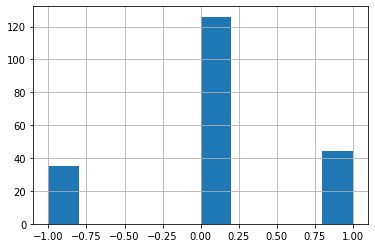

In [69]:

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV


In [86]:
raw_data_fed['clean_review'] = raw_data_fed.text.apply(clean_text)

train=raw_data_fed.head(int(0.6*len(raw_data_fed)))
test=raw_data_fed.tail(int(0.4*len(raw_data_fed))).iloc[:-1,:]
train_label=np.array(train.D).reshape(-1,1)
test_label=np.array(test.D).reshape(-1,1)

In [102]:
test_label

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [ 0.],
       [-1.],
       [-1.],
       [-1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
      

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
for features in range(300,800,100): 
  vectorizer_freq = CountVectorizer(max_features = features) 
  train_vsm_freq = vectorizer_freq.fit_transform(train.clean_review).toarray()
  #print("以词频为元素的文本-单词矩阵的维度是：\n\n",train.shape)
  from scipy import stats
  vectorizer_tfidf=TfidfVectorizer(max_features=features)
  train_vsm_tfidf=vectorizer_tfidf.fit_transform(train.clean_review).toarray()
  test_vsm_tfidf=vectorizer_tfidf.transform(test.clean_review).toarray()
  lr=LogisticRegressionCV(multi_class="multinomial",solver="saga",penalty='l2',class_weight={-1:10,0:1,1:10},cv=3,random_state=0)
  from sklearn import metrics
  from sklearn.metrics import accuracy_score
  lr.fit(train_vsm_tfidf,train_label)
  proba_=lr.predict_proba(test_vsm_tfidf)
  roc = metrics.roc_auc_score(test_label, proba_, multi_class='ovr')
  predict_value=[i.argmax()-1 for i in proba_]
  acc=accuracy_score(predict_value, test_label)
  print(roc,features,acc)

0.8477674494455316 300 0.691358024691358
0.6729025411534476 400 0.691358024691358
0.6654996930278961 500 0.6790123456790124
0.498736881738997 600 0.6049382716049383
0.6820501659567938 700 0.691358024691358


In [65]:
proba_=lr.predict_proba(test_vsm_tfidf)

In [73]:
proba_[0].argmax()

1

In [74]:
proba_[0]

array([0.03808398, 0.91386064, 0.04805539])

In [68]:
from sklearn import metrics
roc = metrics.roc_auc_score(test_label, proba_, multi_class='ovr')
roc

0.7060857824346196